In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

Filling in missing values

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [5]:
education_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

3. In your chosen state, in which of the lessons are the students more successful—math or reading?

4. What are the distributions of the math and reading scores in the sample?

5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [6]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

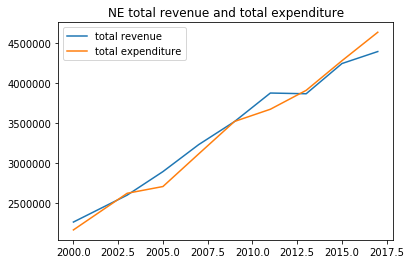

In [8]:
plt.plot(education_df.loc[education_df.STATE == "NEBRASKA", "YEAR"],
         education_df.loc[education_df.STATE == "NEBRASKA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "NEBRASKA", "YEAR"],
         education_df.loc[education_df.STATE == "NEBRASKA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("NE total revenue and total expenditure")
plt.legend()
plt.show()